In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# Text classification for SMS spam detection

In [2]:
import os
with open(os.path.join("datasets", "smsspam", "SMSSpamCollection")) as f:
    lines = [line.strip().split("\t") for line in f.readlines()]
text = [x[1] for x in lines]
y = [x[0] == "ham" for x in lines]

In [3]:
text[:10]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, $1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea $900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had you

In [4]:
y[:10]

[True, True, False, True, True, False, True, True, False, False]

In [5]:
type(text)

list

In [6]:
type(y)

list

In [7]:
from sklearn.cross_validation import train_test_split

text_train, text_test, y_train, y_test = train_test_split(text, y, random_state=42)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(text_train)

X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)

In [9]:
print(len(vectorizer.vocabulary_))

7464


In [10]:
X_train.shape

(4180, 7464)

In [11]:
print(vectorizer.get_feature_names()[:20])

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '02', '0207', '02072069400', '02073162414', '02085076972', '03', '04', '0430', '05', '050703', '0578', '06']


In [12]:
print(vectorizer.get_feature_names()[3000:3020])

['getting', 'getzed', 'gf', 'ghodbandar', 'ghost', 'gibbs', 'gibe', 'gift', 'gifted', 'gifts', 'giggle', 'gimme', 'gimmi', 'gin', 'girl', 'girlfrnd', 'girlie', 'girls', 'gist', 'giv']


In [13]:
print(X_train.shape)
print(X_test.shape)

(4180, 7464)
(1394, 7464)


### Training a Classifier on Text Features

We can now train a classifier, for instance a logistic regression classifier which is a fast baseline for text classification tasks:

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We can now evaluate the classifier on the testing set. Let's first use the builtin score function, which is the rate of correct classification in the test set:

In [16]:
clf.score(X_test, y_test)

0.98278335724533716

We can also compute the score on the training set, to see how well we do there:

In [17]:
clf.score(X_train, y_train)

0.99856459330143543

#Visualizing important features

In [18]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(50), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 51), feature_names[interesting_coefficients], rotation=60, ha="right");

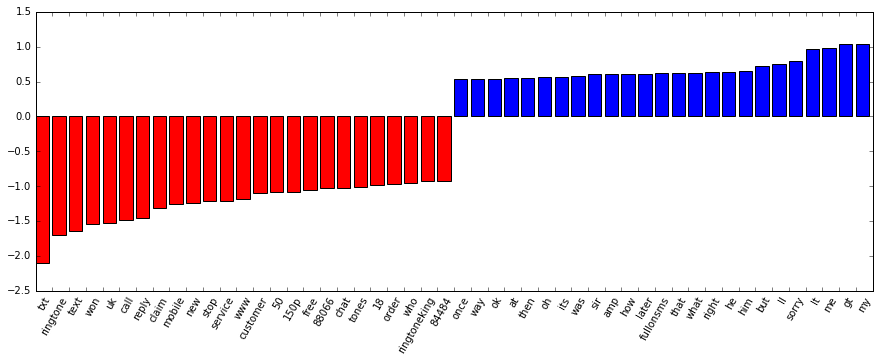

In [19]:
visualize_coefficients(clf, vectorizer.get_feature_names())


In [20]:
vectorizer = CountVectorizer(min_df=2)
vectorizer.fit(text_train)

X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)

clf = LogisticRegression()
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.997607655502
0.982783357245


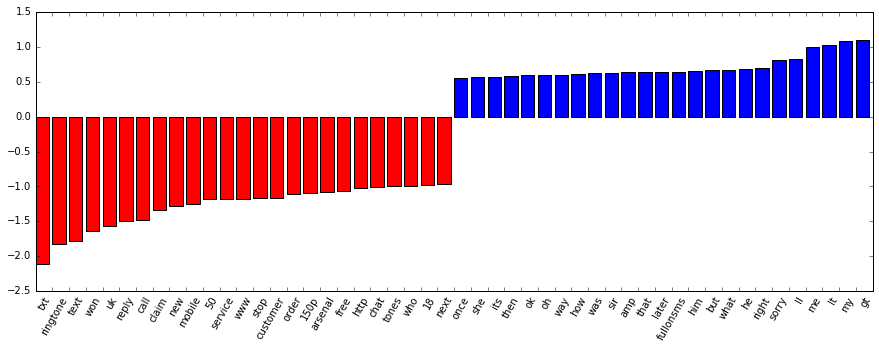

In [21]:
visualize_coefficients(clf, vectorizer.get_feature_names())

<img src="images/supervised_scikit_learn.png" width="80%">


# Exercises

Use TfidfVectorizer instead of CountVectorizer. Are the results better? How are the coefficients different?

Change the parameters min_df and ngram_range of the TfidfVectorizer and CountVectorizer. How does that change the important features?

